In [1]:
#import relevant libraries 
import pandas as pd
import plotly.express as px
import panel as pn
import hvplot.pandas
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import os
from datetime import datetime, timedelta,date
from pandas import DataFrame


Pull in External Functions and Classes

In [2]:
from ticker_data import *
from coin_data import *
from EMA import *
from BOLLINGER import *
from MACD import *
from LSTM import *
from new_order import *
from coin_order import *

Get the Stock Ticker Data

In [3]:
#set the stock of interest
stock_ticker='SPY'
#from ticker_data.py run function get_ticker_data
stock_data_df=get_ticker_data(api, stock_ticker)

Get the Crypto Coin Data

In [4]:
#set the crypto of interest
crypto_ticker='BTC/USD'
#from ticker_data.py run function get_ticker_data
crypto_data_df=get_crypto_data(exchange, crypto_ticker)
crypto_data_df.columns=["Timestamp", "Open", "High", "Low", "Close", "Volume"]


In [5]:
crypto_data_df.head()

Timestamp    Open    High     Low   Close       Volume
Date                                                                  
2018-12-14  1544745600000  3257.5  3308.6  3134.5  3194.9  5605.100741
2018-12-15  1544832000000  3192.9  3225.0  3120.0  3180.1  2346.239268
2018-12-16  1544918400000  3182.7  3265.0  3159.0  3190.5  2794.980254
2018-12-17  1545004800000  3193.2  3587.9  3184.0  3502.0  8781.750580
2018-12-18  1545091200000  3500.5  3690.9  3433.9  3669.1  5489.446708

EMA Simulation and Optimal Calculations

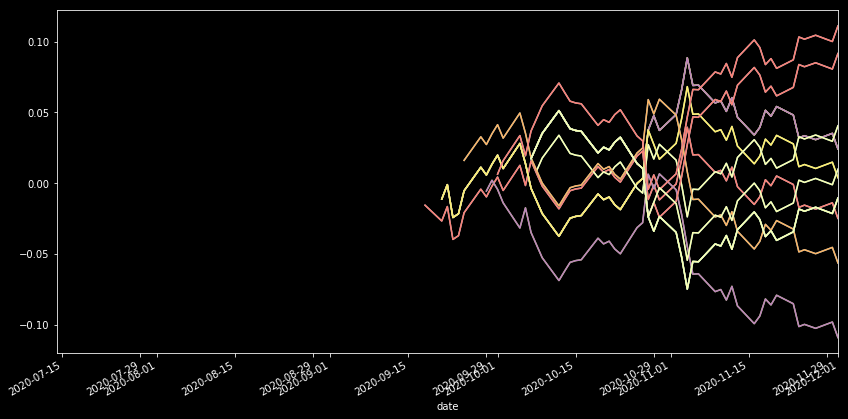

In [6]:
#from EMA.py run EMA_Optimal Calculator
ema_result=EMA_Optimal(stock_data_df)
opt_ema_df=ema_result.head()

In [7]:
#define the optimal outputs as variables
period=opt_ema_df['period'].iloc[0]
long_window=opt_ema_df['long_window'].iloc[0]
short_window=opt_ema_df['short_window'].iloc[0]

('12H', 77.0, 32.0, 0.11094373127118384, date
 2020-07-14    NaN
 2020-07-15    NaN
 2020-07-16    NaN
 2020-07-17    NaN
 2020-07-20    NaN
 2020-07-21    NaN
 2020-07-22    NaN
 2020-07-23    NaN
 2020-07-24    NaN
 2020-07-27    NaN
 2020-07-28    NaN
 2020-07-29    NaN
 2020-07-30    NaN
 2020-07-31    NaN
 2020-08-03    NaN
 2020-08-04    NaN
 2020-08-05    NaN
 2020-08-06    NaN
 2020-08-07    NaN
 2020-08-10    NaN
 2020-08-11    NaN
 2020-08-12    NaN
 2020-08-13    NaN
 2020-08-14    NaN
 2020-08-17    NaN
 2020-08-18    NaN
 2020-08-19    NaN
 2020-08-20    NaN
 2020-08-21    NaN
 2020-08-24    NaN
              ... 
 2020-10-20    1.0
 2020-10-21    1.0
 2020-10-22    1.0
 2020-10-23    1.0
 2020-10-26    1.0
 2020-10-27    1.0
 2020-10-28    1.0
 2020-10-29    1.0
 2020-10-30    1.0
 2020-11-02    1.0
 2020-11-03    1.0
 2020-11-04    1.0
 2020-11-05    1.0
 2020-11-06    1.0
 2020-11-09    1.0
 2020-11-10    1.0
 2020-11-11    1.0
 2020-11-12    1.0
 2020-11-13    1.0
 202

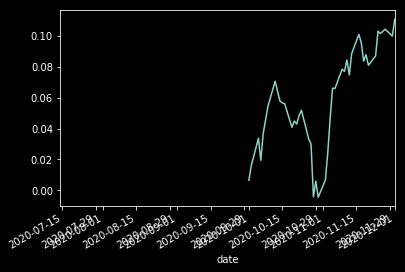

In [8]:
#from EMA.py run the EMA simulator on the optimal variables
EMAsimulator = EMASimulator(
    stock_data_df, 
    #from_date="2018-01-01", 
    period=period, 
    long_window=long_window, 
    short_window=short_window
)
EMAsimulator.simulate()

Bollinger Band Simulation and Optimal Calculations

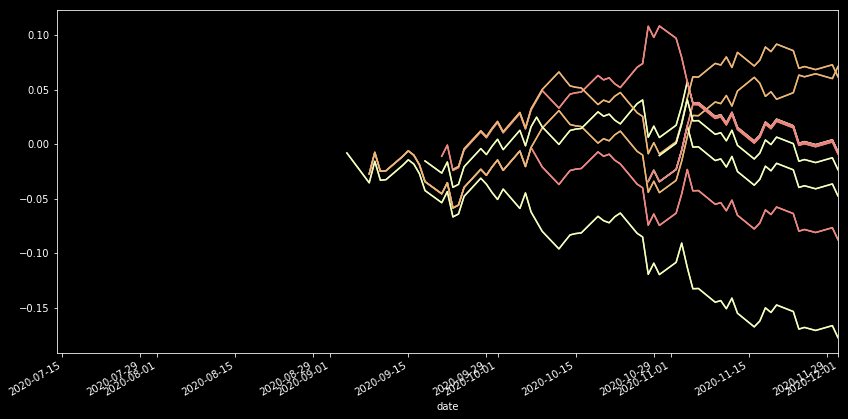

In [9]:
#from BOLLINGER.py run Bollinger_Band_Optimal Calculator
bollinger_result=Bollinger_Band_Optimal(stock_data_df)
opt_bollinger_df=bollinger_result.head()

In [10]:
#define the optimal outputs as variables
period=opt_bollinger_df['period'].iloc[0]
bollinger_window=int(opt_bollinger_df['bollinger_window'].iloc[0])
no_of_std=opt_bollinger_df['no_of_std'].iloc[0]

('12H', 10, 2.0, 0.07097226121848954, date
 2020-07-14    NaN
 2020-07-15    NaN
 2020-07-16    NaN
 2020-07-17    NaN
 2020-07-20    NaN
 2020-07-21    NaN
 2020-07-22    NaN
 2020-07-23    NaN
 2020-07-24    NaN
 2020-07-27    NaN
 2020-07-28    NaN
 2020-07-29    NaN
 2020-07-30    NaN
 2020-07-31    NaN
 2020-08-03    NaN
 2020-08-04    NaN
 2020-08-05    NaN
 2020-08-06    NaN
 2020-08-07    NaN
 2020-08-10    NaN
 2020-08-11    NaN
 2020-08-12    NaN
 2020-08-13    NaN
 2020-08-14    NaN
 2020-08-17    NaN
 2020-08-18    NaN
 2020-08-19    NaN
 2020-08-20    NaN
 2020-08-21    NaN
 2020-08-24    NaN
              ... 
 2020-10-20    1.0
 2020-10-21    1.0
 2020-10-22    1.0
 2020-10-23    1.0
 2020-10-26    1.0
 2020-10-27    1.0
 2020-10-28    1.0
 2020-10-29    1.0
 2020-10-30    1.0
 2020-11-02    1.0
 2020-11-03    1.0
 2020-11-04    1.0
 2020-11-05    1.0
 2020-11-06    1.0
 2020-11-09    1.0
 2020-11-10    1.0
 2020-11-11    1.0
 2020-11-12    1.0
 2020-11-13    1.0
 2020-1

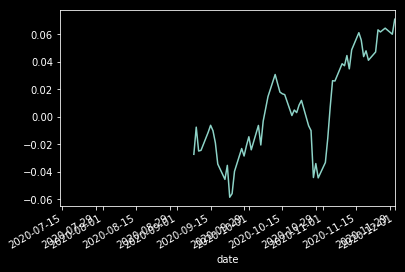

In [11]:
#from BOLLINGER.py run the BOLLINGER simulator on the optimal variables
BOLLINGERsimulator = BollingerBandsSimulator(
    stock_data_df, 
    #from_date="2018-01-01", 
    period=period, 
    bollinger_window=bollinger_window, 
    no_of_std=no_of_std
)
BOLLINGERsimulator.simulate()

MACD Simulation and Optimal Calculations

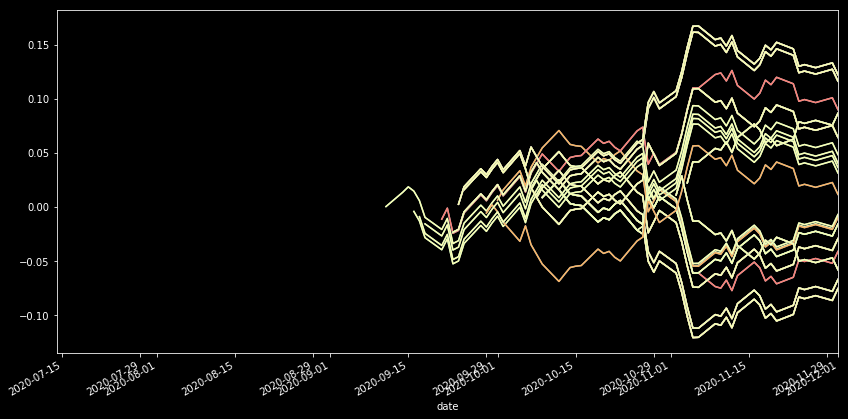

In [12]:
#from MACD.py run MACD_Optimal Calculator
macd_result=MACD_Optimal(stock_data_df)
opt_macd_df=macd_result.head()

In [13]:
#define the optimal outputs as variables
period=opt_macd_df['period'].iloc[0]
span1=opt_macd_df['span1'].iloc[0]
span2=opt_macd_df['span2'].iloc[0]
span3=opt_macd_df['span3'].iloc[0]

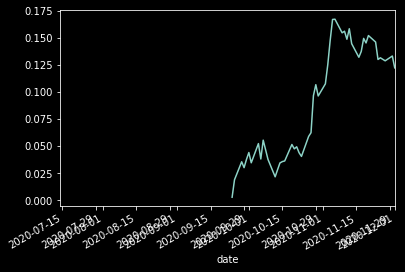

In [14]:
#from MACD.py run the MACD simulator on the optimal variables
MACDsimulator = MACDSimulator(
    stock_data_df, 
    #from_date="2018-01-01", 
    period=period, 
    span1=span1,
    span2=span2,
    span3=span3
)
MACDSignals=MACDsimulator.simulate()

Look at the Resulting Signal Data and Stock Data

In [15]:
stock_data_df.dropna(subset=('EMA Signal','Bollinger Signal', 'MACD Signal'),inplace=True)

In [16]:
ema_signal_df=stock_data_df['EMA Signal']
bollinger_signal_df=stock_data_df['Bollinger Signal']
macd_signal_df=stock_data_df['MACD Signal']
close_df=stock_data_df['Close']

Get All Signals and Combined Signal

In [17]:
#function to get all trading signals
#return data frame holding trading signals
def get_trading_signals(close_df,ema_signal_df,bollinger_signal_df,macd_signal_df):
    trading_signal_df=pd.concat([close_df,ema_signal_df, bollinger_signal_df,macd_signal_df],axis=1,    join="inner")
    trading_signal_df['Signal']=trading_signal_df['EMA Signal']+ trading_signal_df['Bollinger Signal']+ trading_signal_df['MACD Signal']
    #trading_signal_df['Overall Entry/Exit']=trading_signal_df['Signal'].diff()
    return trading_signal_df
    

In [18]:
trading_signal_df=get_trading_signals(close_df,ema_signal_df,bollinger_signal_df,macd_signal_df)
trading_signal_df.tail()

Close  EMA Signal  Bollinger Signal  MACD Signal  Signal
date                                                                 
2020-11-24  363.22         1.0               1.0         -1.0     1.0
2020-11-25  362.66         1.0               1.0         -1.0     1.0
2020-11-27  363.67         1.0               1.0         -1.0     1.0
2020-11-30  362.06         1.0               1.0         -1.0     1.0
2020-12-01  366.02         1.0               1.0         -1.0     1.0

In [19]:
stocks=predict_price_model(trading_signal_df)

X_train sample values:
[[[0.2827902]]] 

X_test sample values:
[[[0.74064099]]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 10)             480       
_________________________________________________________________
dropout (Dropout)            (None, 1, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
__________________________________________

In [20]:
signal_support_df=stocks[0]
signal_support_df

Real   Predicted  Difference  Support
0   356.67  345.919922   10.750078        1
1   353.21  346.839142    6.370858        1
2   358.10  345.635132   12.464868        1
3   362.57  347.348907   15.221093        1
4   360.62  348.981018   11.638982        1
5   356.28  348.262360    8.017640        1
6   357.78  346.701294   11.078706        1
7   355.33  347.234253    8.095747        1
8   357.46  346.367706   11.092294        1
9   363.22  347.119934   16.100066        1
10  362.66  349.222595   13.437405        1
11  363.67  349.014404   14.655596        1
12  362.06  349.390381   12.669619        1

In [21]:
signal_support_value=signal_support_df['Support'].mean()

In [22]:
stocks[1]

:NdOverlay   [Variable]
   :Curve   [index]   (Price (USD))

Check Signals and Call Functions to Place Trades

In [23]:
if trading_signal_df['Signal'][-1]>=1 and signal_support_value>=1:
    #place a buy order
    side='buy'
    order_type='market'
    time_in_force='gtc'
    qty=1
    place_market_order(stock_ticker,qty, side, order_type, time_in_force)
elif trading_signal_df['Signal'][-1]<=-1 and signal_support_value>=1:
    #place a sell order
    side='sell'
    order_type='market'
    time_in_force='gtc'
    qty=1
    place_market_order(stock_ticker,qty, side, order_type, time_in_force)

Apply for Crypto Data Signals and Simulators

EMA Simulator and Optimal Calculation Crypto

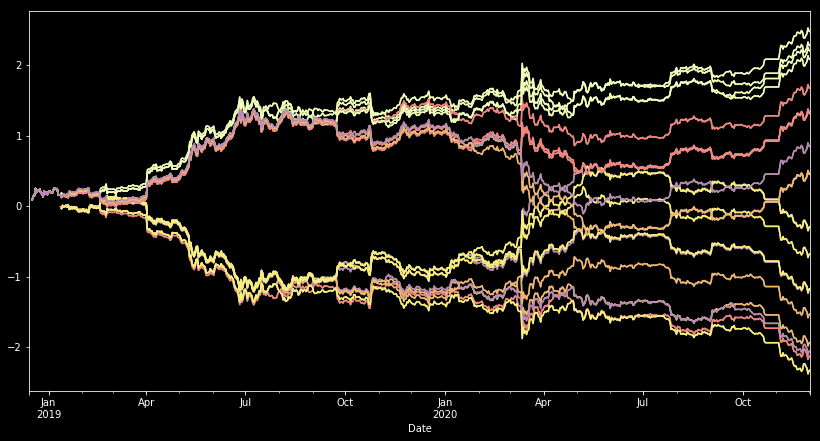

In [24]:
#from EMA.py run EMA_Optimal Calculator
ema_result=EMA_Optimal(crypto_data_df)
opt_ema_df=ema_result.head()

In [25]:
#define the optimal outputs as variables
period=opt_ema_df['period'].iloc[0]
long_window=opt_ema_df['long_window'].iloc[0]
short_window=opt_ema_df['short_window'].iloc[0]

('12H', 100.0, 10.0, 2.4775736528545895, Date
 2018-12-14    NaN
 2018-12-15    NaN
 2018-12-16    NaN
 2018-12-17    1.0
 2018-12-18    1.0
 2018-12-19    1.0
 2018-12-20    1.0
 2018-12-21    1.0
 2018-12-22    1.0
 2018-12-23    1.0
 2018-12-24    1.0
 2018-12-25    1.0
 2018-12-26    1.0
 2018-12-27    1.0
 2018-12-28    1.0
 2018-12-29    1.0
 2018-12-30    1.0
 2018-12-31    1.0
 2019-01-01    1.0
 2019-01-02    1.0
 2019-01-03    1.0
 2019-01-04    1.0
 2019-01-05    1.0
 2019-01-06    1.0
 2019-01-07    1.0
 2019-01-08    1.0
 2019-01-09    1.0
 2019-01-10    1.0
 2019-01-11    1.0
 2019-01-12    1.0
              ... 
 2020-11-03    1.0
 2020-11-04    1.0
 2020-11-05    1.0
 2020-11-06    1.0
 2020-11-07    1.0
 2020-11-08    1.0
 2020-11-09    1.0
 2020-11-10    1.0
 2020-11-11    1.0
 2020-11-12    1.0
 2020-11-13    1.0
 2020-11-14    1.0
 2020-11-15    1.0
 2020-11-16    1.0
 2020-11-17    1.0
 2020-11-18    1.0
 2020-11-19    1.0
 2020-11-20    1.0
 2020-11-21    1.0
 202

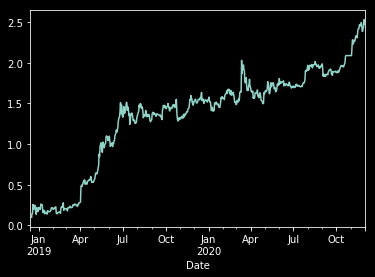

In [26]:
#from EMA.py run the EMA simulator on the optimal variables
EMAsimulator = EMASimulator(
    crypto_data_df, 
    #from_date="2018-01-01", 
    period=period, 
    long_window=long_window, 
    short_window=short_window
)
EMAsimulator.simulate()

Bollinger Bands Simulator and Optimal Calculation Crypto

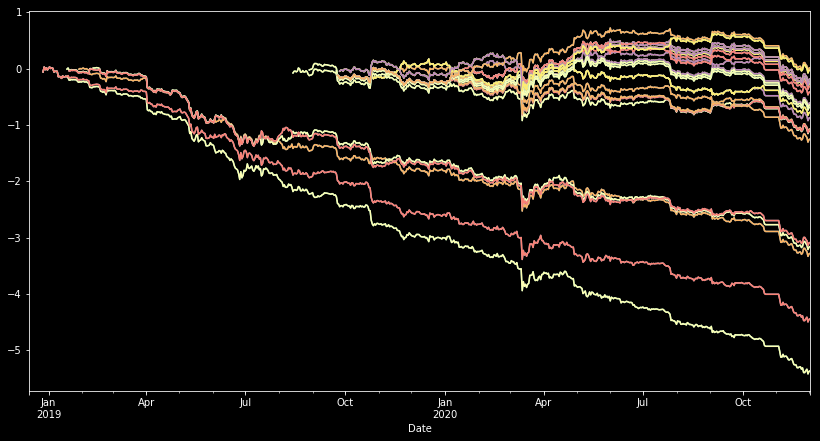

In [27]:
#from BOLLINGER.py run Bollinger_Band_Optimal Calculator
bollinger_result=Bollinger_Band_Optimal(crypto_data_df)
opt_bollinger_df=bollinger_result.head()

In [28]:
#define the optimal outputs as variables
period=opt_bollinger_df['period'].iloc[0]
bollinger_window=int(opt_bollinger_df['bollinger_window'].iloc[0])
no_of_std=opt_bollinger_df['no_of_std'].iloc[0]

('48H', 100, 2.0, 0.016781553839064767, Date
 2018-12-14    NaN
 2018-12-15    NaN
 2018-12-16    NaN
 2018-12-17    NaN
 2018-12-18    NaN
 2018-12-19    NaN
 2018-12-20    NaN
 2018-12-21    NaN
 2018-12-22    NaN
 2018-12-23    NaN
 2018-12-24    NaN
 2018-12-25    NaN
 2018-12-26    NaN
 2018-12-27    NaN
 2018-12-28    NaN
 2018-12-29    NaN
 2018-12-30    NaN
 2018-12-31    NaN
 2019-01-01    NaN
 2019-01-02    NaN
 2019-01-03    NaN
 2019-01-04    NaN
 2019-01-05    NaN
 2019-01-06    NaN
 2019-01-07    NaN
 2019-01-08    NaN
 2019-01-09    NaN
 2019-01-10    NaN
 2019-01-11    NaN
 2019-01-12    NaN
              ... 
 2020-11-03   -1.0
 2020-11-04   -1.0
 2020-11-05   -1.0
 2020-11-06   -1.0
 2020-11-07   -1.0
 2020-11-08   -1.0
 2020-11-09   -1.0
 2020-11-10   -1.0
 2020-11-11   -1.0
 2020-11-12   -1.0
 2020-11-13   -1.0
 2020-11-14   -1.0
 2020-11-15   -1.0
 2020-11-16   -1.0
 2020-11-17   -1.0
 2020-11-18   -1.0
 2020-11-19   -1.0
 2020-11-20   -1.0
 2020-11-21   -1.0
 2020

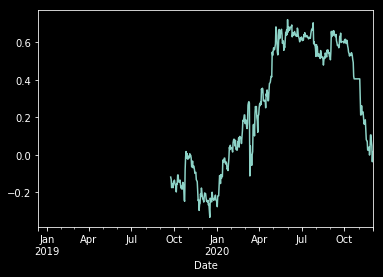

In [29]:
#from BOLLINGER.py run the BOLLINGER simulator on the optimal variables
BOLLINGERsimulator = BollingerBandsSimulator(
    crypto_data_df, 
    #from_date="2018-01-01", 
    period=period, 
    bollinger_window=bollinger_window, 
    no_of_std=no_of_std
)
BOLLINGERsimulator.simulate()

MACD Simulator and Optimal Calculation Crypto

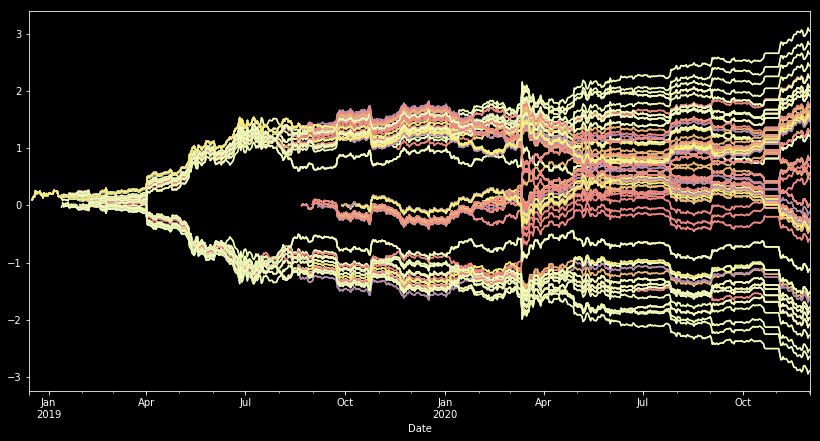

In [30]:
#from MACD.py run MACD_Optimal Calculator
macd_result=MACD_Optimal(crypto_data_df)
opt_macd_df=macd_result.head()

In [31]:
#define the optimal outputs as variables
period=opt_macd_df['period'].iloc[0]
span1=opt_macd_df['span1'].iloc[0]
span2=opt_macd_df['span2'].iloc[0]
span3=opt_macd_df['span3'].iloc[0]

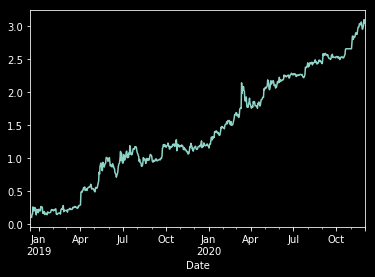

In [32]:
#from MACD.py run the MACD simulator on the optimal variables
MACDsimulator = MACDSimulator(
    crypto_data_df, 
    #from_date="2018-01-01", 
    period=period, 
    span1=span1,
    span2=span2,
    span3=span3
)
MACDSignals=MACDsimulator.simulate()

In [33]:
crypto_data_df.dropna(subset=('EMA Signal','Bollinger Signal', 'MACD Signal'),inplace=True)
crypto_data_df.head()

Timestamp    Open    High     Low   Close        Volume  \
Date                                                                      
2019-09-24  1569283200000  9696.0  9776.0  8046.0  8536.7  16439.013842   
2019-09-25  1569369600000  8535.0  8743.6  8000.0  8439.0  10165.917653   
2019-09-26  1569456000000  8439.0  8465.7  7730.0  8060.3  10824.421096   
2019-09-27  1569542400000  8063.0  8290.0  7850.0  8196.0   7405.798149   
2019-09-28  1569628800000  8195.9  8426.0  8024.9  8213.5   3824.927748   

              EWM Short     EWM Long  EMA Signal  EMA Daily Return  ...  \
Date                                                                ...   
2019-09-24  9799.184888  9877.154072        -1.0         -0.118738  ...   
2019-09-25  9551.878545  9848.582084        -1.0         -0.011445  ...   
2019-09-26  9280.682446  9813.056372        -1.0         -0.044875  ...   
2019-09-27  9083.467456  9780.934253        -1.0          0.016836  ...   
2019-09-28  8925.291555  9749.799804        -1.0          0.002135  ...   

            Bollinger Signal  Bollinger Daily Return  \
Date                                                   
2019-09-24               1.0               -0.118738   
2019-09-25               1.0               -0.011445   
2019-09-26               1.0               -0.044875   
2019-09-27               1.0                0.016836   
2019-09-28               1.0                0.002135   

            Bollinger Strategy Return          exp1          exp2        macd  \
Date                                                                            
2019-09-24                  -0.118738  10026.181674  10156.604681 -130.423007   
2019-09-25                  -0.011445   9881.892431  10104.556054 -222.663624   
2019-09-26                  -0.044875   9716.293119  10042.608901 -326.315782   
2019-09-27                   0.016836   9578.084653   9986.651056 -408.566402   
2019-09-28                   0.002135   9454.031503   9932.919205 -478.887702   

              macdout  MACD Signal  MACD Daily Return  MACD Strategy Return  
Date                                                                         
2019-09-24  54.576674         -1.0          -0.118738              0.118738  
2019-09-25  29.373011         -1.0          -0.011445              0.011445  
2019-09-26  -2.962334         -1.0          -0.044875              0.044875  
2019-09-27 -39.835431         -1.0           0.016836             -0.016836  
2019-09-28 -79.749274         -1.0           0.002135             -0.002135  

[5 rows x 25 columns]

In [34]:
ema_signal_df=crypto_data_df['EMA Signal']
bollinger_signal_df=crypto_data_df['Bollinger Signal']
macd_signal_df=crypto_data_df['MACD Signal']
close_df=crypto_data_df['Close']

In [35]:
trading_signal_df=get_trading_signals(close_df,ema_signal_df,bollinger_signal_df,macd_signal_df)
trading_signal_df.head()

Close  EMA Signal  Bollinger Signal  MACD Signal  Signal
Date                                                                 
2019-09-24  8536.7        -1.0               1.0         -1.0    -1.0
2019-09-25  8439.0        -1.0               1.0         -1.0    -1.0
2019-09-26  8060.3        -1.0               1.0         -1.0    -1.0
2019-09-27  8196.0        -1.0               1.0         -1.0    -1.0
2019-09-28  8213.5        -1.0               1.0         -1.0    -1.0

In [36]:
crypto=predict_price_model(trading_signal_df)

X_train sample values:
[[[0.24812728]]] 

X_test sample values:
[[[0.32049858]]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 10)             480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_______________________________________

In [37]:
signal_support_df=stocks[0]
signal_support_df.tail(50)

Real   Predicted  Difference  Support
0   356.67  345.919922   10.750078        1
1   353.21  346.839142    6.370858        1
2   358.10  345.635132   12.464868        1
3   362.57  347.348907   15.221093        1
4   360.62  348.981018   11.638982        1
5   356.28  348.262360    8.017640        1
6   357.78  346.701294   11.078706        1
7   355.33  347.234253    8.095747        1
8   357.46  346.367706   11.092294        1
9   363.22  347.119934   16.100066        1
10  362.66  349.222595   13.437405        1
11  363.67  349.014404   14.655596        1
12  362.06  349.390381   12.669619        1

In [38]:
if trading_signal_df['Signal'][-1]>=1 and signal_support_value>=1:
    #place a buy order on kraken
    
    binance_buy_order(crypto_ticker)

    ###FUNCTION HERE
elif trading_signal_df['Signal'][-1]<=-1 and signal_support_value>=-1:
    #place a sell order on kraken
    sell_coin_order(crypto_ticker)
    ####FUNCTION

NameError: name 'binance_buy_order' is not defined